<a href="https://colab.research.google.com/github/ss-ghule/kaggle_predicting_molecular_properties/blob/master/c4_w4_model_train_eval_exp_1_orig_my_std.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training & Evaluation

## ##Training & Evaluation is currently being carried out in google Colaboratory due to less free resources available in IBM watson studio

# Download Data

In [0]:
# The code was removed by Watson Studio for sharing.

In [0]:
'''
from ibm_botocore.client import Config
import ibm_boto3
def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')
'''

In [3]:
#download_file_cos(credentials_2,'train_feat_eng.csv','train_feat_eng.csv')
#ownload_file_cos(credentials_2,'test_feat_eng.csv','test_feat_eng.csv')
#download_file_cos(credentials_2,'sample_submission.csv','sample_submission.csv')
!ls

connectivity_model_nn_03.h5
data.covs.pickle
dipole_moments.csv.zip
kaggle.json
magnetic_shielding_tensors.csv.zip
mulliken_charges.csv.zip
pairs_dict.pkl
potential_energy.csv.zip
sample_data
sample_submission.csv.zip
scalar_coupling_contributions.csv.zip
structures.csv.zip
structures.zip
test.csv.zip
test_etl.csv
test_feat_eng_v2_orig_my_ext_not_std.csv
test_feat_eng_v2_orig_my_ext_std.csv
test_feat_eng_v2_orig_my_not_std.csv
test_feat_eng_v2_orig_my_std.csv
train.csv.zip
train_etl.csv
train_feat_eng_v2_orig_my_ext_not_std.csv
train_feat_eng_v2_orig_my_ext_std.csv
train_feat_eng_v2_orig_my_not_std.csv
train_feat_eng_v2_orig_my_std.csv


# EXP NO.1 (orig+my+std)

# Dowload Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pickle
%matplotlib inline

In [2]:
tf.__version__

'1.14.0'

In [4]:
train=pd.read_csv('train_feat_eng_v2_orig_my_std.csv')
train.head()

,id,molecule_name,atom_index_0,atom_index_1,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,mulliken_charge_0,mulliken_charge_1,type,scalar_coupling_constant,distance,type_enc,atom_1_enc,atom_0_enc,pairs,pairs_enc,bond,bond_int
0,0,dsgdb9nsd_000001,1,0,H,-0.058940,0.101017,-0.028861,C,-0.074536,0.838296,-0.055483,0.263942,-2.057703,1JHC,84.8076,-1.722482,0,0,1,c_h,2,0.919759,1
1,1,dsgdb9nsd_000001,1,2,H,-0.058940,0.101017,-0.028861,H,0.617919,1.052165,-0.061633,0.263942,0.729230,2JHH,-11.2570,-0.784301,3,1,1,h_h,11,0.648310,1
2,2,dsgdb9nsd_000001,1,3,H,-0.058940,0.101017,-0.028861,H,-0.431513,1.042984,-0.759868,0.263942,0.729234,2JHH,-11.2548,-0.784264,3,1,1,h_h,11,0.648205,1
3,3,dsgdb9nsd_000001,1,4,H,-0.058940,0.101017,-0.028861,H,-0.420021,1.037555,0.659852,0.263942,0.729234,2JHH,-11.2543,-0.784251,3,1,1,h_h,11,0.648170,1
4,4,dsgdb9nsd_000001,2,0,H,0.514726,0.793727,-0.029947,C,-0.074536,0.838296,-0.055483,0.263964,-2.057703,1JHC,84.8074,-1.722484,0,0,1,c_h,2,0.919759,1


In [5]:
train.shape

(4658147, 24)

In [6]:
test=pd.read_csv('test_feat_eng_v2_orig_my_std.csv')
test.head()

,id,molecule_name,atom_index_0,atom_index_1,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,mulliken_charge_0,mulliken_charge_1,type,distance,type_enc,atom_1_enc,atom_0_enc,pairs,pairs_enc,bond,bond_int
0,4658147,dsgdb9nsd_000004,2,0,H,-1.004343,0.10386,0.609053,C,0.339301,0.223874,0.734382,-7.526702e-13,-0.098154,2JHC,-0.135391,2,0,1,c_h,2,0.413226,0
1,4658148,dsgdb9nsd_000004,2,1,H,-1.004343,0.10386,0.609053,C,-0.471207,0.223874,0.734382,-7.526702e-13,-0.098154,1JHC,-1.763005,0,0,1,c_h,2,0.917924,1
2,4658149,dsgdb9nsd_000004,2,3,H,-1.004343,0.10386,0.609053,H,1.057219,0.223874,0.734382,-7.526702e-13,0.663743,3JHH,1.306289,6,1,1,h_h,11,0.173375,0
3,4658150,dsgdb9nsd_000004,3,0,H,0.884018,0.10386,0.609053,C,0.339301,0.223874,0.734382,-7.526702e-13,-0.098154,1JHC,-1.763005,0,0,1,c_h,2,0.917924,1
4,4658151,dsgdb9nsd_000004,3,1,H,0.884018,0.10386,0.609053,C,-0.471207,0.223874,0.734382,-7.526702e-13,-0.098154,2JHC,-0.135391,2,0,1,c_h,2,0.413226,0


In [7]:
test.shape

(2505542, 23)

# Drop Columns

In [8]:
train.columns

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'atom_0', 'x_0',
       'y_0', 'z_0', 'atom_1', 'x_1', 'y_1', 'z_1', 'mulliken_charge_0',
       'mulliken_charge_1', 'type', 'scalar_coupling_constant', 'distance',
       'type_enc', 'atom_1_enc', 'atom_0_enc', 'pairs', 'pairs_enc', 'bond',
       'bond_int'],
      dtype='object')

In [0]:
drop_cols=['id', 'molecule_name','atom_0','atom_1','type', 'pairs','bond']

In [10]:
train.drop(drop_cols,axis=1,inplace=True)
train.head()

,atom_index_0,atom_index_1,x_0,y_0,z_0,x_1,y_1,z_1,mulliken_charge_0,mulliken_charge_1,scalar_coupling_constant,distance,type_enc,atom_1_enc,atom_0_enc,pairs_enc,bond_int
0,1,0,-0.058940,0.101017,-0.028861,-0.074536,0.838296,-0.055483,0.263942,-2.057703,84.8076,-1.722482,0,0,1,2,1
1,1,2,-0.058940,0.101017,-0.028861,0.617919,1.052165,-0.061633,0.263942,0.729230,-11.2570,-0.784301,3,1,1,11,1
2,1,3,-0.058940,0.101017,-0.028861,-0.431513,1.042984,-0.759868,0.263942,0.729234,-11.2548,-0.784264,3,1,1,11,1
3,1,4,-0.058940,0.101017,-0.028861,-0.420021,1.037555,0.659852,0.263942,0.729234,-11.2543,-0.784251,3,1,1,11,1
4,2,0,0.514726,0.793727,-0.029947,-0.074536,0.838296,-0.055483,0.263964,-2.057703,84.8074,-1.722484,0,0,1,2,1


In [11]:
test.columns

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'atom_0', 'x_0',
       'y_0', 'z_0', 'atom_1', 'x_1', 'y_1', 'z_1', 'mulliken_charge_0',
       'mulliken_charge_1', 'type', 'distance', 'type_enc', 'atom_1_enc',
       'atom_0_enc', 'pairs', 'pairs_enc', 'bond', 'bond_int'],
      dtype='object')

In [12]:
test.drop(drop_cols,axis=1,inplace=True)
test.head()

,atom_index_0,atom_index_1,x_0,y_0,z_0,x_1,y_1,z_1,mulliken_charge_0,mulliken_charge_1,distance,type_enc,atom_1_enc,atom_0_enc,pairs_enc,bond_int
0,2,0,-1.004343,0.10386,0.609053,0.339301,0.223874,0.734382,-7.526702e-13,-0.098154,-0.135391,2,0,1,2,0
1,2,1,-1.004343,0.10386,0.609053,-0.471207,0.223874,0.734382,-7.526702e-13,-0.098154,-1.763005,0,0,1,2,1
2,2,3,-1.004343,0.10386,0.609053,1.057219,0.223874,0.734382,-7.526702e-13,0.663743,1.306289,6,1,1,11,0
3,3,0,0.884018,0.10386,0.609053,0.339301,0.223874,0.734382,-7.526702e-13,-0.098154,-1.763005,0,0,1,2,1
4,3,1,0.884018,0.10386,0.609053,-0.471207,0.223874,0.734382,-7.526702e-13,-0.098154,-0.135391,2,0,1,2,0


In [13]:
train.dtypes

atom_index_0                  int64
atom_index_1                  int64
x_0                         float64
y_0                         float64
z_0                         float64
x_1                         float64
y_1                         float64
z_1                         float64
mulliken_charge_0           float64
mulliken_charge_1           float64
scalar_coupling_constant    float64
distance                    float64
type_enc                      int64
atom_1_enc                    int64
atom_0_enc                    int64
pairs_enc                     int64
bond_int                      int64
dtype: object

In [14]:
test.dtypes

atom_index_0           int64
atom_index_1           int64
x_0                  float64
y_0                  float64
z_0                  float64
x_1                  float64
y_1                  float64
z_1                  float64
mulliken_charge_0    float64
mulliken_charge_1    float64
distance             float64
type_enc               int64
atom_1_enc             int64
atom_0_enc             int64
pairs_enc              int64
bond_int               int64
dtype: object

In [15]:
print(train.shape)
print(test.shape)

(4658147, 17)
(2505542, 16)


# Creating training, validation and testing data

In [16]:
x=train.drop('scalar_coupling_constant',axis=1)
x.head()

,atom_index_0,atom_index_1,x_0,y_0,z_0,x_1,y_1,z_1,mulliken_charge_0,mulliken_charge_1,distance,type_enc,atom_1_enc,atom_0_enc,pairs_enc,bond_int
0,1,0,-0.058940,0.101017,-0.028861,-0.074536,0.838296,-0.055483,0.263942,-2.057703,-1.722482,0,0,1,2,1
1,1,2,-0.058940,0.101017,-0.028861,0.617919,1.052165,-0.061633,0.263942,0.729230,-0.784301,3,1,1,11,1
2,1,3,-0.058940,0.101017,-0.028861,-0.431513,1.042984,-0.759868,0.263942,0.729234,-0.784264,3,1,1,11,1
3,1,4,-0.058940,0.101017,-0.028861,-0.420021,1.037555,0.659852,0.263942,0.729234,-0.784251,3,1,1,11,1
4,2,0,0.514726,0.793727,-0.029947,-0.074536,0.838296,-0.055483,0.263964,-2.057703,-1.722484,0,0,1,2,1


In [17]:
y=train['scalar_coupling_constant']
y.head()

0    84.8076
1   -11.2570
2   -11.2548
3   -11.2543
4    84.8074
Name: scalar_coupling_constant, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3)

In [20]:
print('x_train: {}   y_train: {}'.format(x_train.shape,y_train.shape))
print('x_val: {}   y_val: {}'.format(x_val.shape,y_val.shape))

x_train: (3260702, 16)   y_train: (3260702,)
x_val: (1397445, 16)   y_val: (1397445,)


In [21]:
x_test=test
x_test.shape

(2505542, 16)

# Training & Evaluation

In [22]:
import gc
gc.collect()

0

## Linear Model (Baseline)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model_lr=LinearRegression()

In [26]:
model_lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
model_lr.score(x_train,y_train)

0.6465675917835193

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
y_pred=model_lr.predict(x_val)

In [32]:
mean_absolute_error(y_val,y_pred)

16.263165786971904

## GBM (Baseline)

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
model_gbm=GradientBoostingRegressor()

In [35]:
model_gbm.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
model_gbm.score(x_train,y_train)

0.988358235128943

In [0]:
y_pred=model_gbm.predict(x_val)

In [40]:
mean_absolute_error(y_val,y_pred)

2.4829541034621534

## lightgbm (Baseline test)

In [0]:
import lightgbm

In [90]:
%%timeit
params = {'boosting': 'gbdt', 'colsample_bytree': 1, 
          'learning_rate': 0.1, 'max_depth': 40, 'metric': 'mae',
          'min_child_samples': 50, 'num_leaves': 500, 
          'objective': 'regression', 'reg_alpha': 0.5, 
          'reg_lambda': 0.8, 'subsample': 0.5 }
lgtrain = lightgbm.Dataset(x_train, label=y_train)
lgval = lightgbm.Dataset(x_val, label=y_val)

model_lgb = lightgbm.train(params, lgtrain, 5000, 
                      valid_sets=[lgtrain, lgval], early_stopping_rounds=2, 
                      verbose_eval=500)


Training until validation scores don't improve for 2 rounds.
[500]	training's l1: 1.41036	valid_1's l1: 1.51036
[1000]	training's l1: 1.2593	valid_1's l1: 1.42543
[1500]	training's l1: 1.15682	valid_1's l1: 1.37838
[2000]	training's l1: 1.07693	valid_1's l1: 1.34625
[2500]	training's l1: 1.00956	valid_1's l1: 1.3218
Early stopping, best iteration is:
[2899]	training's l1: 0.964452	valid_1's l1: 1.30726
Training until validation scores don't improve for 2 rounds.
[500]	training's l1: 1.41036	valid_1's l1: 1.51036
[1000]	training's l1: 1.2593	valid_1's l1: 1.42543


KeyboardInterrupt: ignored

In [47]:
y_pred = model_lgb.predict(x_val)

NameError: ignored

## xgboost (baseline)

In [0]:
import xgboost as xgb

## NN Model

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(15,8))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()


  plt.show()

### Shallow NN

In [53]:
input_shape=(16,)
model_nn_small=keras.Sequential()
model_nn_small.add(keras.layers.Dense(10,activation='relu',input_shape=input_shape))
model_nn_small.add(keras.layers.Dense(20,activation='relu'))
model_nn_small.add(keras.layers.Dense(20,activation='relu'))
model_nn_small.add(keras.layers.Dense(1))

model_nn_small.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_nn_small.compile(optimizer='adam',loss='mean_absolute_error')

In [55]:
model_nn_small.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 3260702 samples, validate on 1397445 samples
Epoch 1/20
3260702/3260702 [==============================] - 28s 8us/sample - loss: 3.9966 - val_loss: 3.3210
Epoch 2/20
3260702/3260702 [==============================] - 24s 7us/sample - loss: 3.2898 - val_loss: 3.2375
Epoch 3/20
3260702/3260702 [==============================] - 24s 7us/sample - loss: 3.1999 - val_loss: 3.1575
Epoch 4/20
3260702/3260702 [==============================] - 24s 7us/sample - loss: 3.1303 - val_loss: 3.0933
Epoch 5/20
3260702/3260702 [==============================] - 24s 7us/sample - loss: 3.0936 - val_loss: 3.0836
Epoch 6/20
3260702/3260702 [==============================] - 25s 8us/sample - loss: 3.0389 - val_loss: 3.0108
Epoch 7/20
3260702/3260702 [==============================] - 24s 7us/sample - loss: 3.0091 - val_loss: 2.9942
Epoch 8/20
3260702/3260702 [==============================] - 24s 7us/sample - loss: 2.9875 - val_loss: 2.9861
Epoch 9/20
3260702/3260702 [==============================

###  DNN

In [93]:
input_shape=(16,)
model_dnn=keras.Sequential()
model_dnn.add(keras.layers.Dense(64,activation='relu',input_shape=input_shape))
model_dnn.add(keras.layers.Dense(128,activation='relu'))
model_dnn.add(keras.layers.Dense(256,activation='relu'))
model_dnn.add(keras.layers.Dense(512,activation='relu'))
model_dnn.add(keras.layers.Dense(512,activation='relu'))
model_dnn.add(keras.layers.Dense(128,activation='relu'))
model_dnn.add(keras.layers.Dense(64,activation='relu'))
model_dnn.add(keras.layers.Dense(8,activation='relu'))
model_dnn.add(keras.layers.Dense(1))

model_dnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_40 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_41 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_42 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_43 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_44 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_45 (Dense)             (None, 64)               

In [0]:
model_dnn.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),loss='mean_absolute_error')

In [101]:
history=model_dnn.fit(x_train,y_train,epochs=30,batch_size=512,validation_data=(x_val,y_val))

Train on 3260702 samples, validate on 1397445 samples
Epoch 1/30
3260702/3260702 [==============================] - 34s 11us/sample - loss: 4.0756 - val_loss: 4.2941
Epoch 2/30
3260702/3260702 [==============================] - 33s 10us/sample - loss: 4.3109 - val_loss: 4.3459
Epoch 3/30
3260702/3260702 [==============================] - 33s 10us/sample - loss: 4.2874 - val_loss: 4.2649
Epoch 4/30
3260702/3260702 [==============================] - 34s 10us/sample - loss: 4.2680 - val_loss: 4.1865
Epoch 5/30
3260702/3260702 [==============================] - 33s 10us/sample - loss: 4.2460 - val_loss: 4.2146
Epoch 6/30
3260702/3260702 [==============================] - 33s 10us/sample - loss: 4.2319 - val_loss: 4.1680
Epoch 7/30
3260702/3260702 [==============================] - 33s 10us/sample - loss: 4.2263 - val_loss: 4.2226
Epoch 8/30
3260702/3260702 [==============================] - 33s 10us/sample - loss: 4.2128 - val_loss: 4.2664
Epoch 9/30
3260702/3260702 [======================

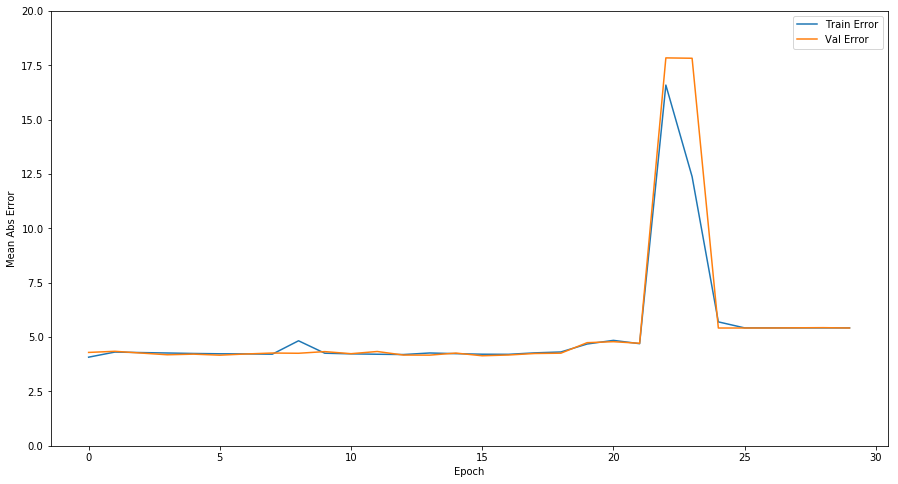

In [104]:
plot_history(history)

# Train on whole data with the best model

In [0]:
model_dnn.fit(x,y,epochs=5,batch_size=512,validation_data=(x_val,y_val))

Train on 4658147 samples, validate on 1397445 samples
Epoch 1/5
4658147/4658147 [==============================] - 41s 9us/sample - loss: 3.1120 - val_loss: 3.0486
Epoch 2/5
4658147/4658147 [==============================] - 41s 9us/sample - loss: 3.0955 - val_loss: 3.1948
Epoch 3/5
4658147/4658147 [==============================] - 41s 9us/sample - loss: 3.0829 - val_loss: 3.0855
Epoch 4/5
4658147/4658147 [==============================] - 41s 9us/sample - loss: 3.0748 - val_loss: 2.9660
Epoch 5/5
4658147/4658147 [==============================] - 40s 9us/sample - loss: 3.0661 - val_loss: 3.0940


# Serialize the model

In [106]:
tf.keras.models.save_model(model_dnn,'kaggle_model_dnn_exp_1.h5',overwrite=True,include_optimizer=True)

W0816 20:01:40.772604 139653762348928 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).


In [0]:
!ls

# Create Submission file

In [0]:
import gc
gc.collect()

634

In [113]:
#test=pd.read_csv('test_feat_eng_v2.csv')
test_predictions=model_dnn.predict(test,verbose=1,batch_size=10000)
test_predictions[:10]

2505542/2505542 [==============================] - 2s 1us/sample


array([[ 1.4251924],
       [87.362045 ],
       [ 1.4251924],
       [87.362045 ],
       [ 1.4251924],
       [87.362045 ],
       [ 1.4251924],
       [ 1.4251924],
       [ 1.4251924],
       [87.362045 ]], dtype=float32)

In [114]:
test_predictions.shape

(2505542, 1)

In [115]:
sample_submission=pd.read_csv('sample_submission.csv.zip')
sample_submission.head()

,id,scalar_coupling_constant
0,4658147,0
1,4658148,0
2,4658149,0
3,4658150,0
4,4658151,0


In [116]:
sample_submission['scalar_coupling_constant']=test_predictions
sample_submission.head()

,id,scalar_coupling_constant
0,4658147,1.425192
1,4658148,87.362045
2,4658149,1.425192
3,4658150,87.362045
4,4658151,1.425192


In [0]:
sample_submission.to_csv('sample_submission_exp_1.csv',index=False)

In [0]:
!ls

data.covs.pickle
dipole_moments.csv.zip
kaggle.json
kaggle_model_nn_v2_04.h5
magnetic_shielding_tensors.csv.zip
mulliken_charges.csv.zip
potential_energy.csv.zip
sample_data
sample_submission.csv.zip
sample_submission_distance_baseline_test_02.csv
sample_submission_external_feat_v2_01.csv
scalar_coupling_contributions.csv.zip
structures.csv.zip
structures.zip
test.csv.zip
test_etl.csv
test_feat_eng_v2.csv
train.csv.zip
train_etl.csv
train_feat_eng_v2.csv


In [0]:
!head sample_submission_distance_baseline_test.csv

id,scalar_coupling_constant
4658147,-3.2472324
4658148,91.86721
4658149,10.933329
4658150,107.796974
4658151,1.5662003
4658152,107.1634
4658153,2.08945
4658154,-11.683802
4658155,-10.687826


# Upload to IBM object store

In [0]:
from ibm_botocore.client import Config
import ibm_boto3
def upload_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.upload_file(Filename=local_file_name, Bucket=credentials['BUCKET'],Key=key)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Uploaded')

In [0]:
upload_file_cos(credentials_2,'sample_submission_test_3.csv','sample_submission_test_3.csv')

In [0]:
upload_file_cos(credentials_2,'kaggle_model_nn_03.h5','kaggle_model_nn_03.h5')